In [10]:
import numpy as np
import sep
# additional setup for reading the test image and displaying plots
#import fitsio
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [18., 15.]

In [11]:
# read image into standard 2-d numpy array
hdu = fits.open("../Galactic-PNe/Galactic PN_halpha.fits")
wcs = WCS(hdu[0].header)
hdu[0].data

array([[5.58682484e-17, 5.35745163e-17, 5.80397894e-17, ...,
        7.01432814e-17, 6.53160341e-17, 2.62167517e-17],
       [4.37661461e-17, 5.38502454e-17, 6.89500767e-17, ...,
        8.14981882e-17, 6.12596396e-17, 4.66999406e-17],
       [7.08290406e-17, 6.79429082e-17, 7.75583204e-17, ...,
        8.02565901e-17, 5.95209059e-17, 7.31660641e-17],
       ...,
       [1.13584418e-16, 1.09204219e-16, 1.14674431e-16, ...,
        6.22169589e-17, 6.38868446e-17, 6.93937698e-17],
       [8.89903336e-17, 9.86519620e-17, 1.08204495e-16, ...,
        7.61076242e-17, 9.11313550e-17, 1.06731439e-16],
       [9.50327226e-17, 8.74953469e-17, 8.38804552e-17, ...,
        7.60152182e-17, 9.25040380e-17, 1.10269614e-16]], dtype=float32)

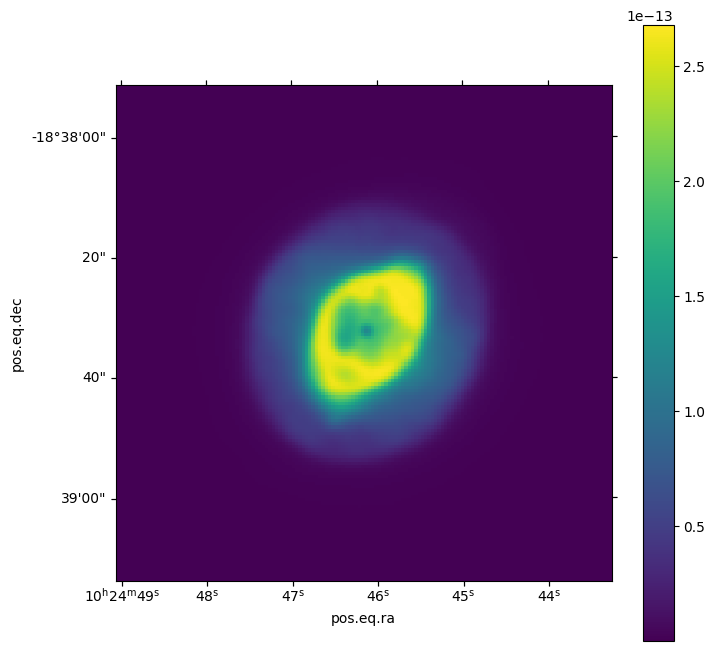

In [13]:
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)

plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=wcs)
plt.imshow(hdu[0].data, origin='lower')
plt.colorbar();
#plt.savefig("difference_Ha.jpg")

## Try impove the contrast

In [14]:
data = hdu[0].data

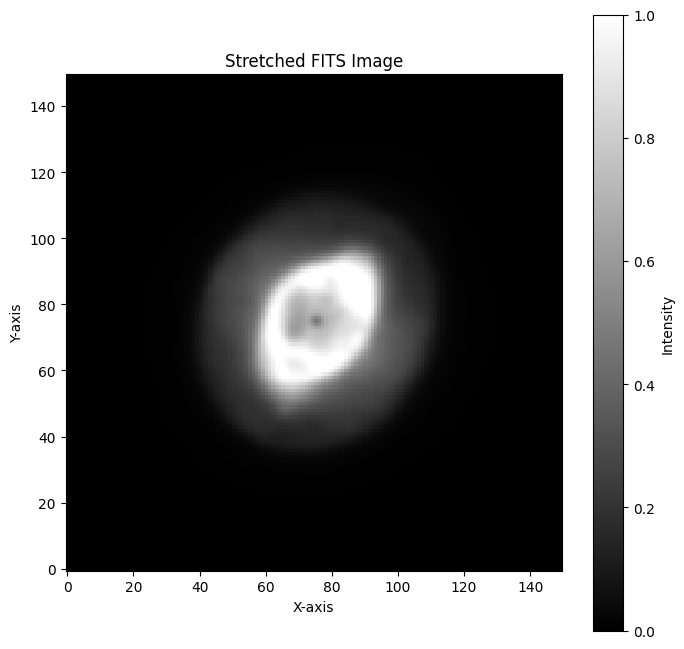

In [15]:

# Apply histogram stretching (linear stretch)
min_value = np.percentile(data, 1)
max_value = np.percentile(data, 99)
stretched_data = np.clip((data - min_value) / (max_value - min_value), 0, 1)

# Plot the stretched FITS image
plt.figure(figsize=(8, 8))
plt.imshow(stretched_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Stretched FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


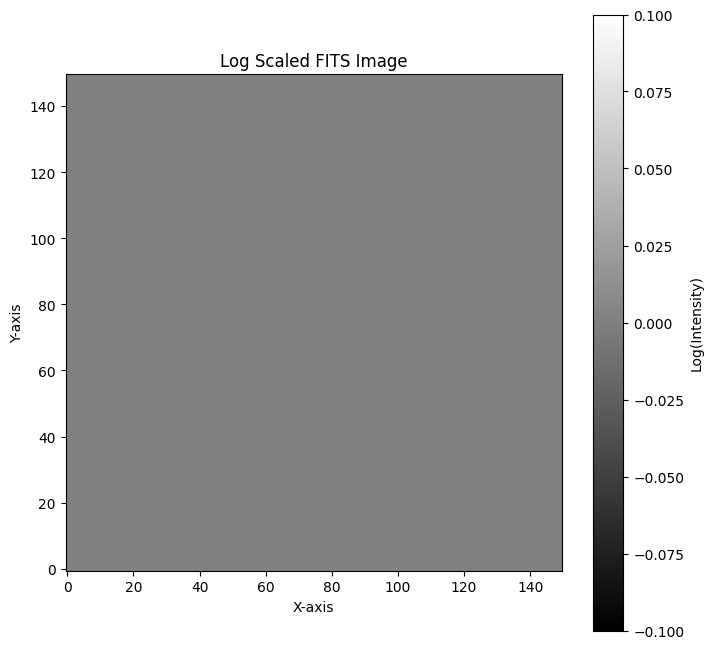

In [16]:
# Apply logarithmic scaling
log_data = np.log(data + 1)  # Adding 1 to avoid logarithm of zero

# Plot the logarithmically scaled FITS image
plt.figure(figsize=(8, 8))
plt.imshow(log_data, cmap='gray', origin='lower')
plt.colorbar(label='Log(Intensity)')
plt.title('Log Scaled FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


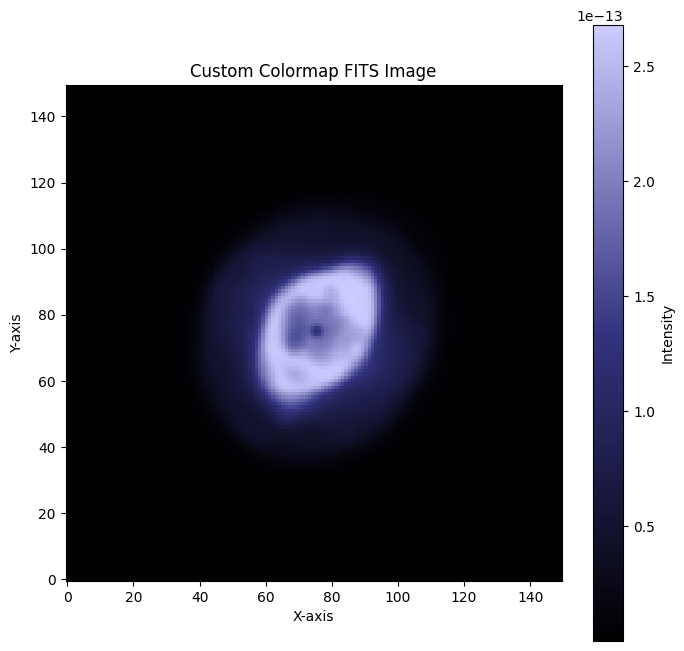

In [17]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap that emphasizes dim regions
colors = [(0, 0, 0), (0.2, 0.2, 0.5), (0.8, 0.8, 1)]  # Dark to light
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

# Plot the FITS image using the custom colormap
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap=custom_cmap, origin='lower')
plt.colorbar(label='Intensity')
plt.title('Custom Colormap FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


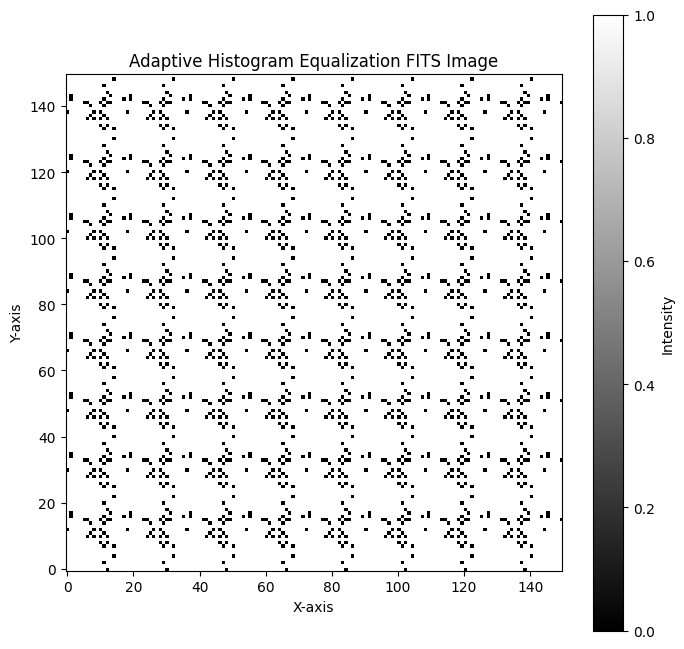

In [18]:
from skimage import exposure

# Apply CLAHE for adaptive histogram equalization
equalized_data = exposure.equalize_adapthist(data, clip_limit=0.03)

# Plot the equalized FITS image
plt.figure(figsize=(8, 8))
plt.imshow(equalized_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Adaptive Histogram Equalization FITS Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


/tmp/ipykernel_392479/3283556682.py:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_data = denoise_wavelet(data, multichannel=False)


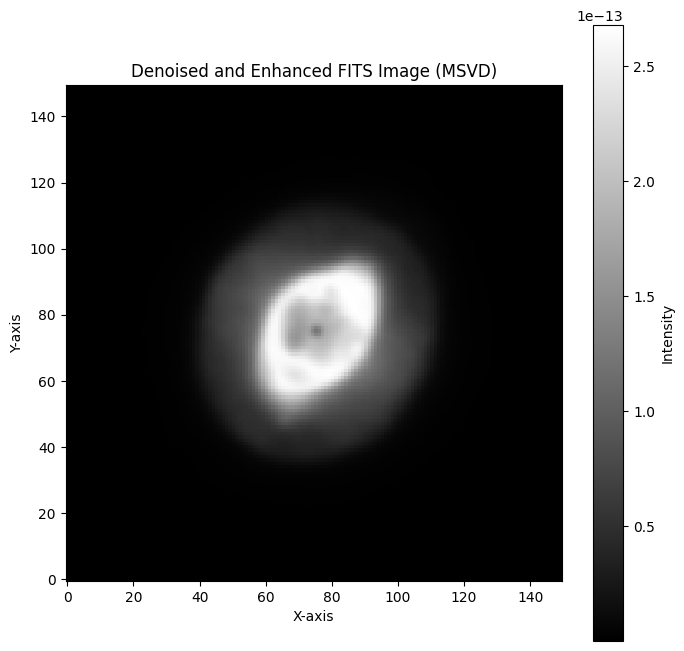

In [20]:
from skimage.restoration import denoise_wavelet

# Apply MSVD-based denoising and enhancement
denoised_data = denoise_wavelet(data, multichannel=False)

# Plot the denoised and enhanced FITS image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Denoised and Enhanced FITS Image (MSVD)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
